# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.layers import Dense
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (15,10)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS </h3>

# 2-Data collection and EDA

In [2]:
df = pd.read_csv('./forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## check for null and duplicates

In [3]:
df.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [4]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
df.drop(index=list(df[df.duplicated()].index),inplace=True)

**Drop month and day feature since it is already one hot encoded**

In [6]:
df.drop(columns=['month','day'],inplace=True)

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3 - Visualization

<Axes: xlabel='size_category', ylabel='count'>

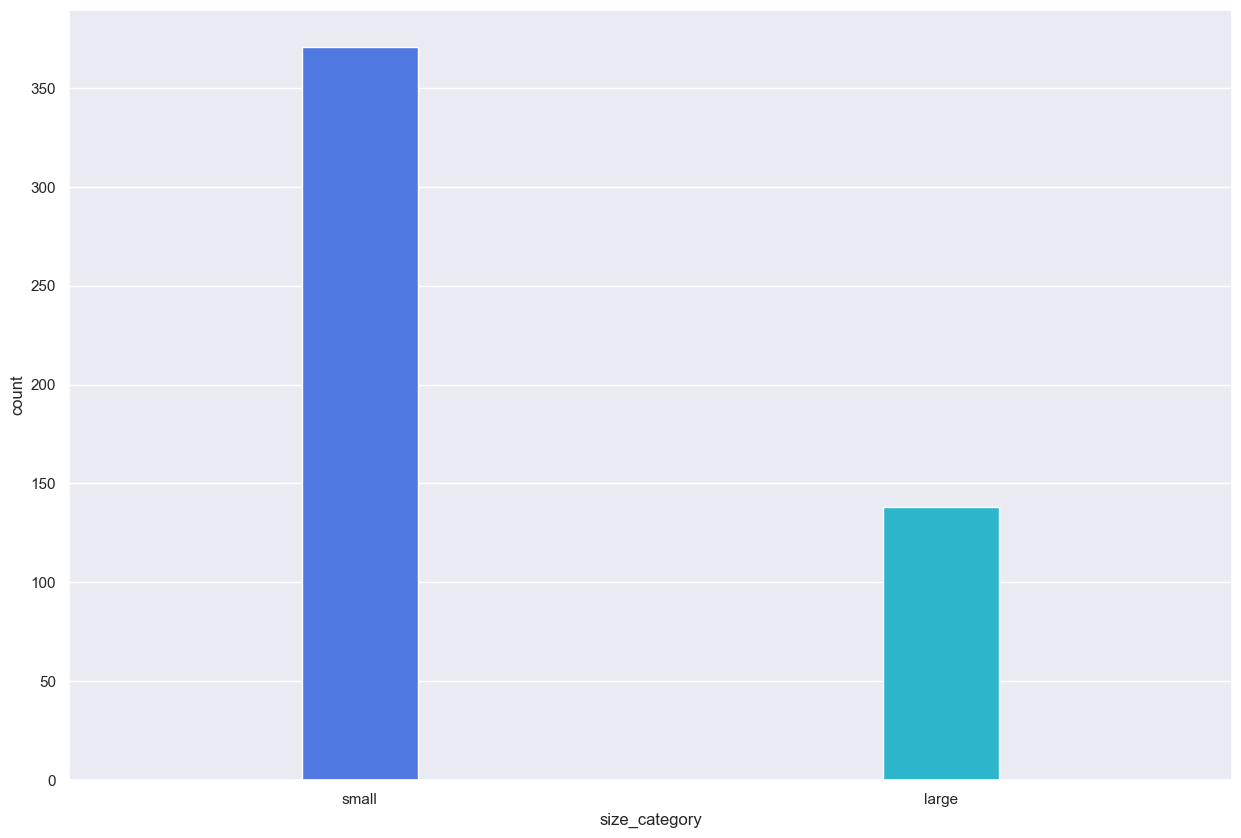

In [8]:
sns.countplot(data=df,x='size_category',width=0.2)

In [9]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

C:\Users\sagar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


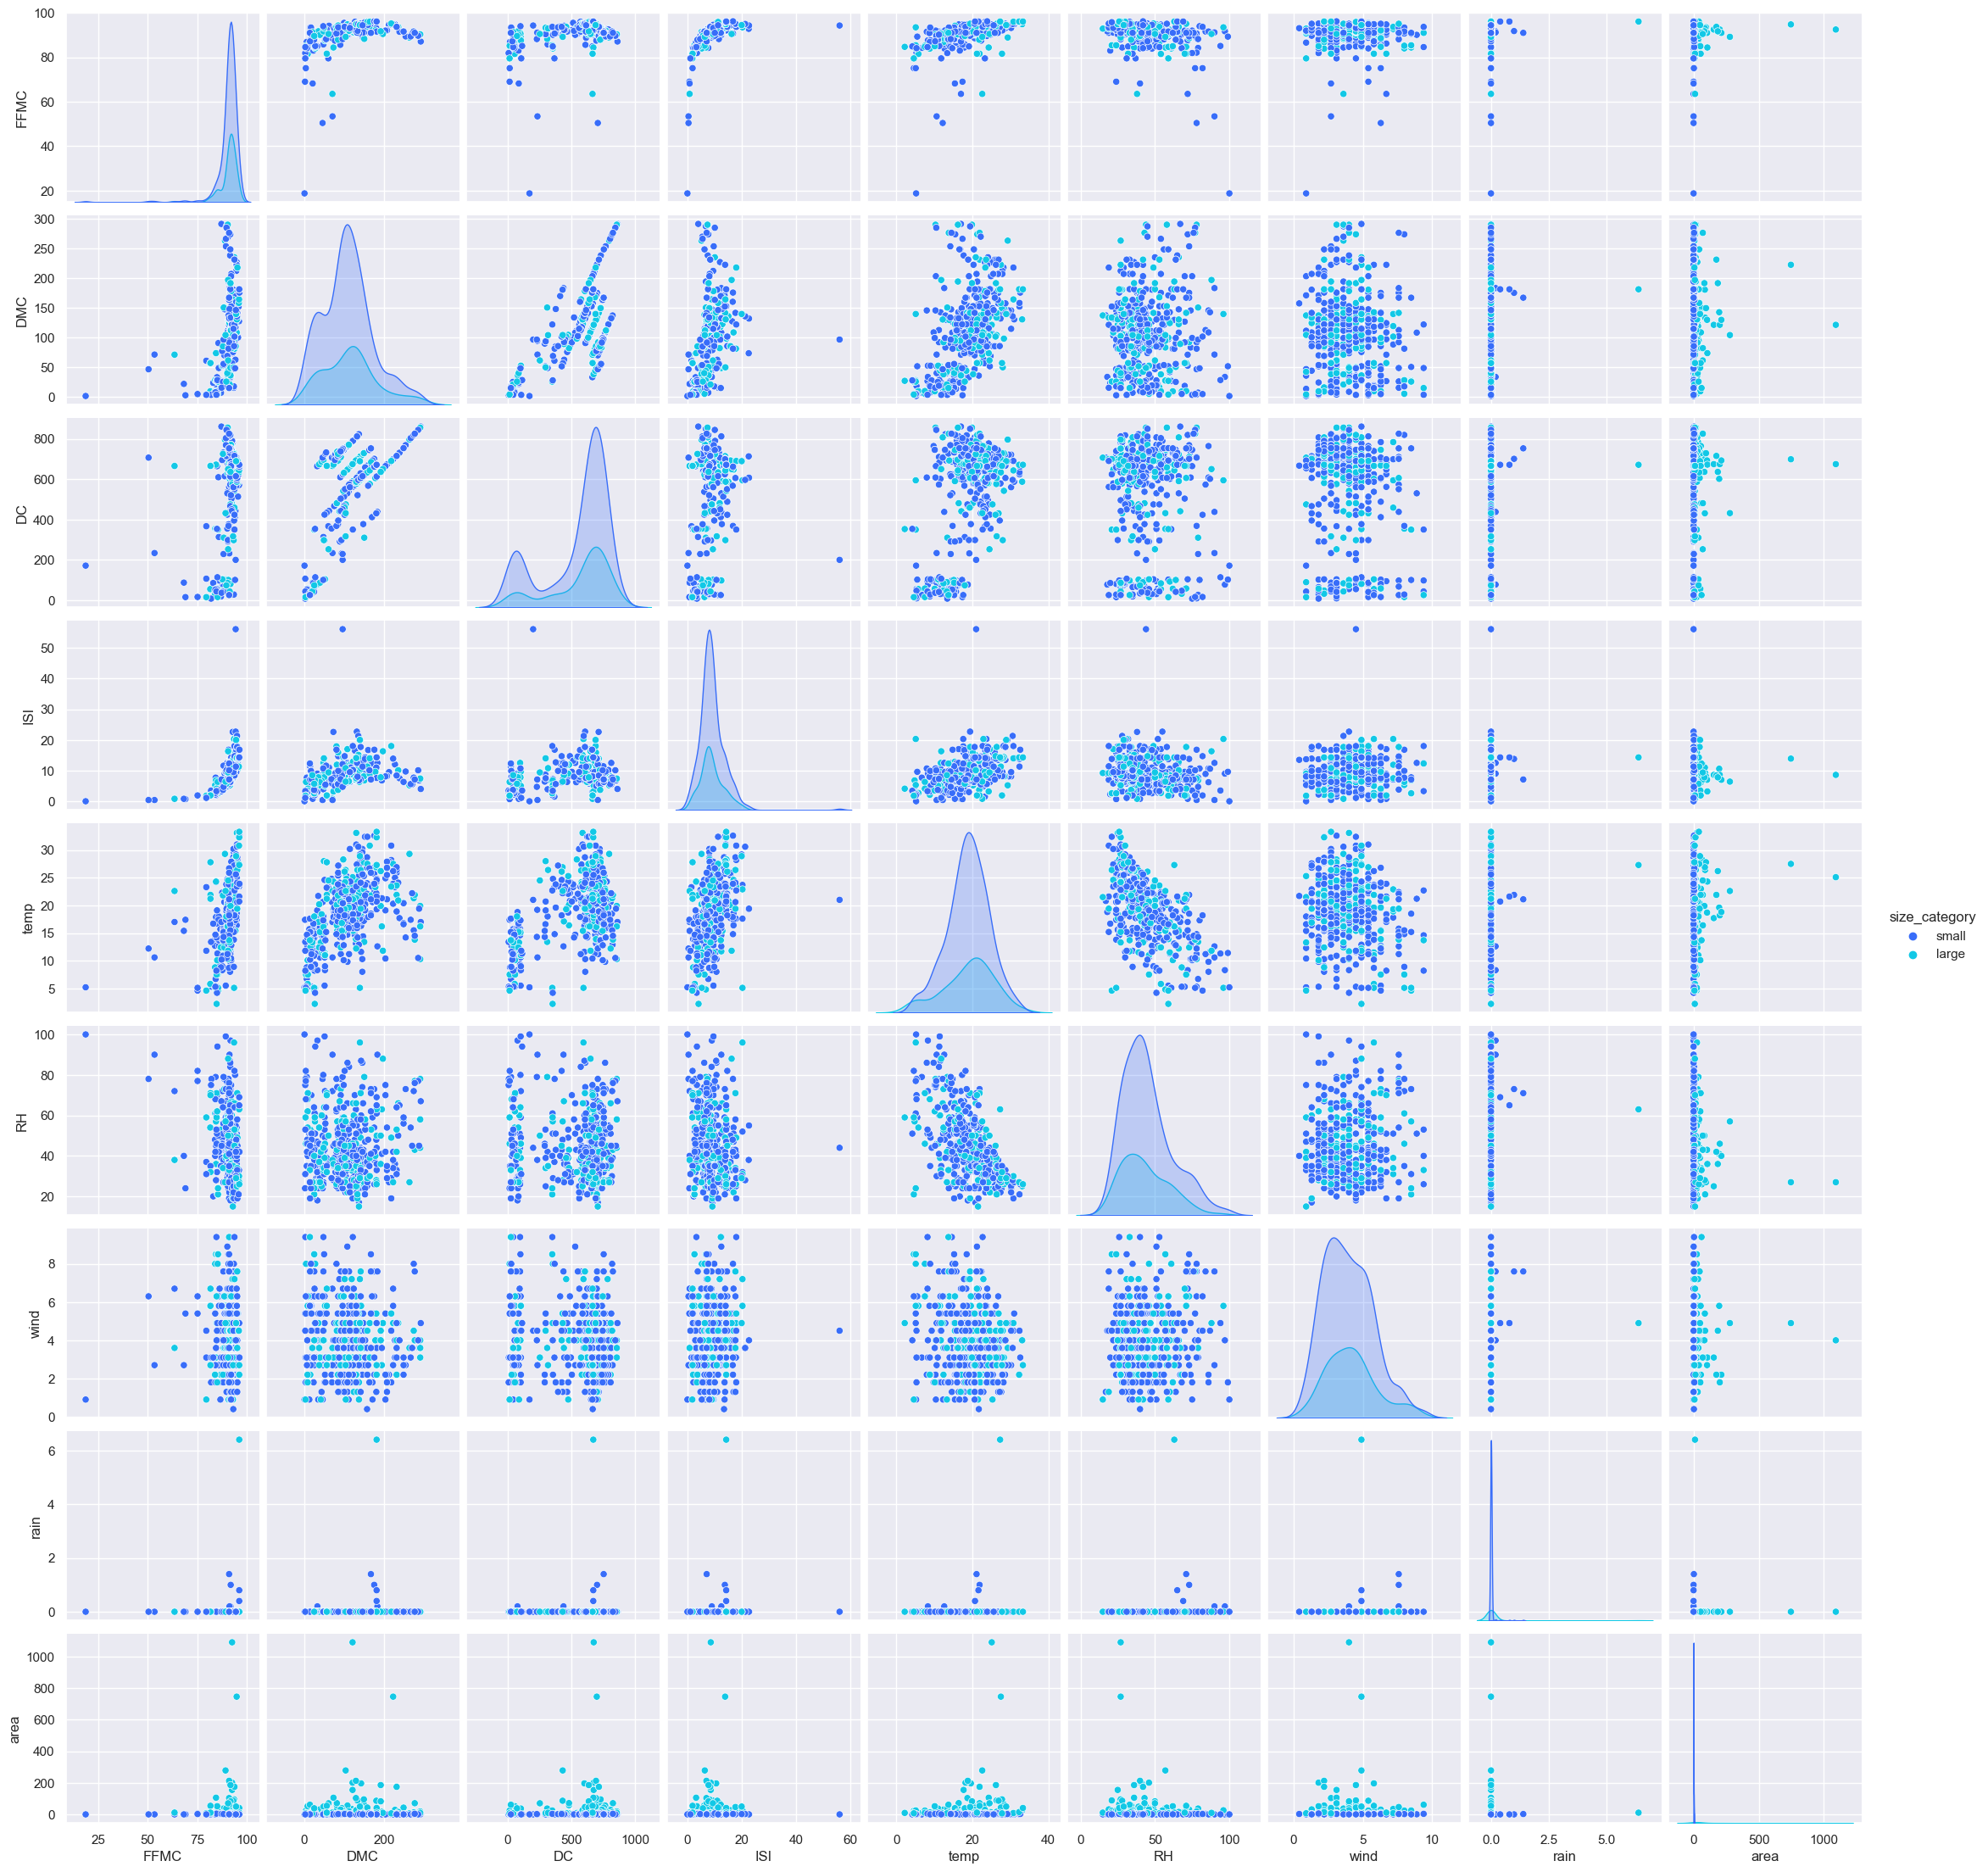

In [10]:
sns.pairplot(data=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area','size_category']],hue='size_category')

## DataPreprocessing

In [11]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('size_category',axis=1)
Y = df['size_category']

In [13]:
lbenc = LabelEncoder()
Y = lbenc.fit_transform(Y)

In [14]:
std = StandardScaler()
scaled = std.fit_transform(X)

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,Y,test_size=0.2,random_state=42)

# 4 - Model

In [16]:
def plot_history(hist):
    hist = hist.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = len(acc)
    
    plt.subplot(1,2,1)
    plt.plot(range(epochs),loss,label='loss')
    plt.plot(range(epochs),val_loss,label='val_loss')
    plt.legend()
    plt.tight_layout()
    plt.subplot(1,2,2)
    plt.plot(range(epochs),acc,label='accuracy')
    plt.plot(range(epochs),val_acc,label='val_accuracy')
    plt.tight_layout()
    plt.legend()
    plt.show()
    

## Baseline Model

In [17]:
x_in = tf.keras.Input(shape=(28))
x = tf.keras.layers.Dense(16,activation='relu')(x_in)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = Model(inputs=[x_in],outputs=[x])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [19]:
history = model.fit(xtrain,ytrain,batch_size=16,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
26/26 [==============================] - 1s 9ms/step - loss: 0.8652 - accuracy: 0.4128 - val_loss: 0.7693 - val_accuracy: 0.4314
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.7688 - accuracy: 0.5233 - val_loss: 0.7019 - val_accuracy: 0.5294
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5872 - val_loss: 0.6541 - val_accuracy: 0.6373
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6339 - val_loss: 0.6207 - val_accuracy: 0.6863
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6929 - val_loss: 0.5958 - val_accuracy: 0.7353
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7322 - val_loss: 0.5784 - val_accuracy: 0.7353
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7543 - val_loss: 0.5648 - val_accuracy: 0.7451
Epoch 8/50
26/26 [==

C:\Users\sagar\AppData\Local\Temp\ipykernel_10048\2930908805.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


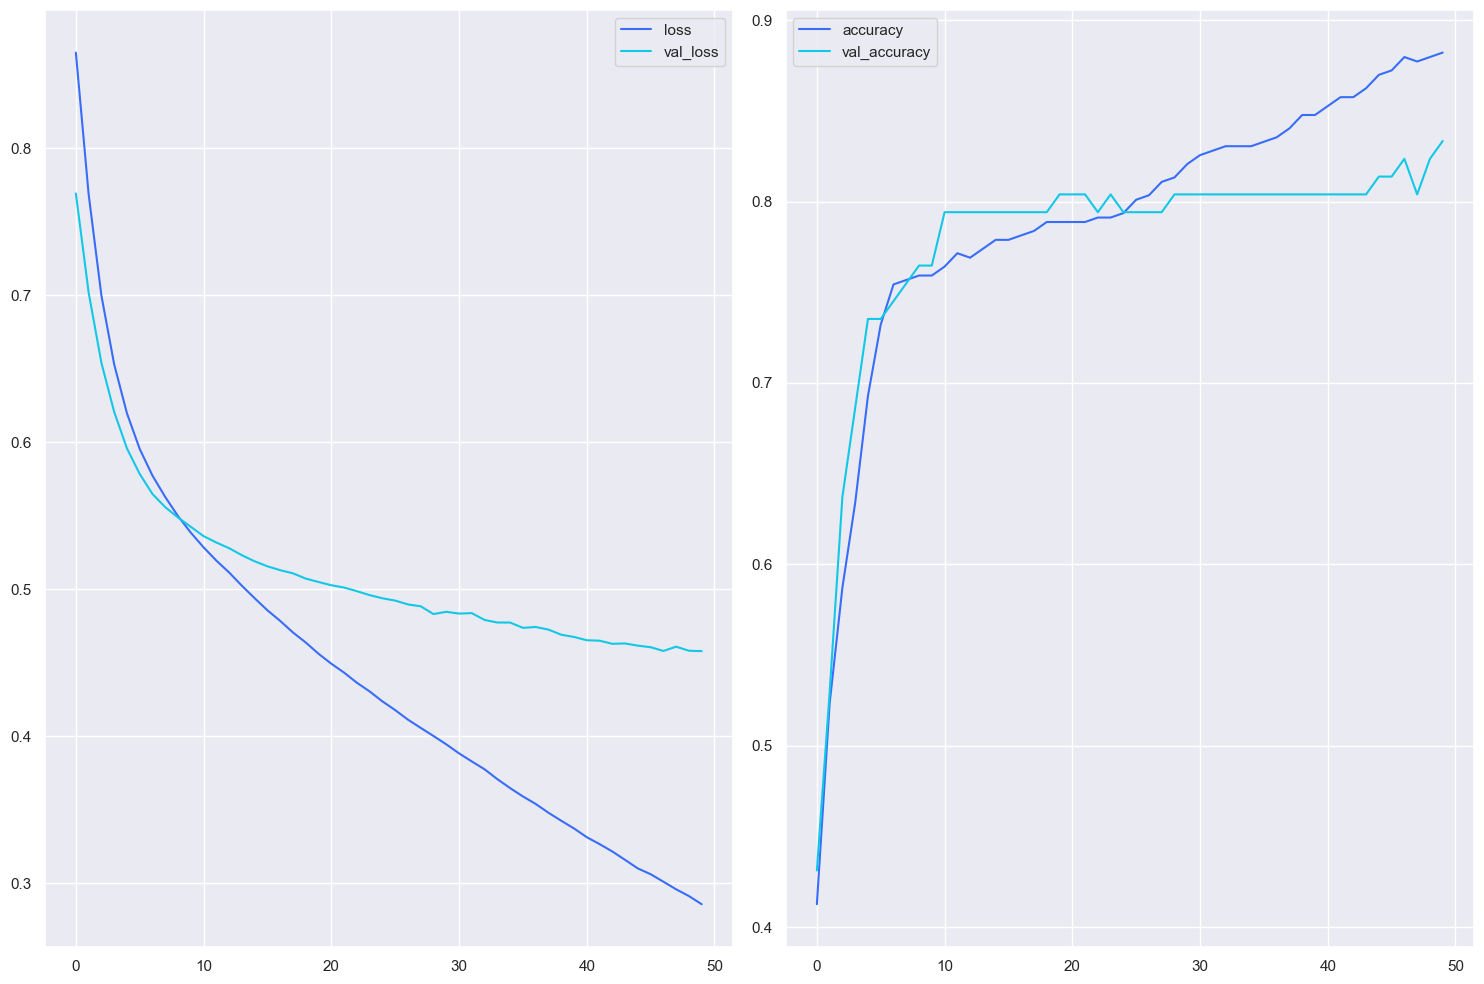

In [20]:
plot_history(history)

In [21]:
ypred = model.predict(xtest)
ypred = ypred > 0.5

4/4 [==============================] - 0s 2ms/step


In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.60        29
           1       0.82      0.99      0.89        73

    accuracy                           0.83       102
   macro avg       0.87      0.72      0.75       102
weighted avg       0.85      0.83      0.81       102



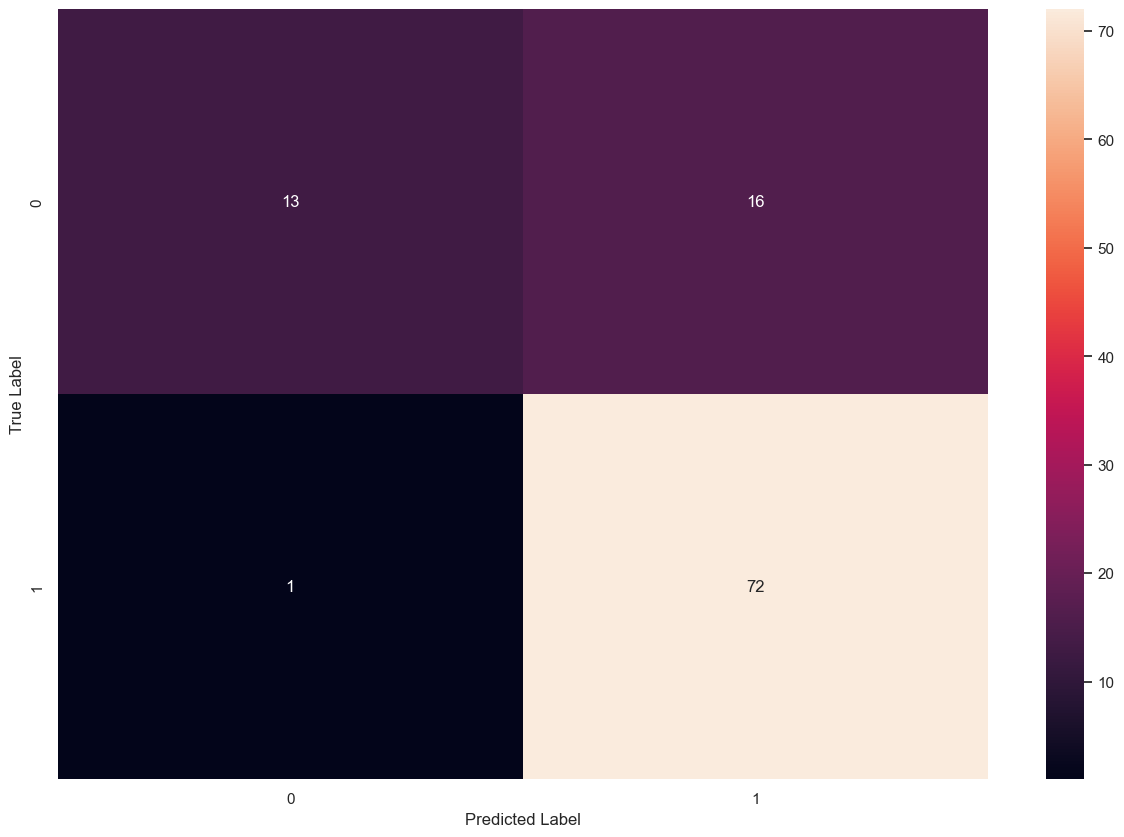

In [23]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5 - Hyperparameter tuning

In [24]:
import keras_tuner as kt

In [25]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value = 1, max_value=10)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                           input_dim=28))
            counter = counter + 1
        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer= hp.Choice('Optimizer',values=['adam','rmsprop','sgd']),
                     loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [26]:
tuner = kt.RandomSearch(hyper,
                       objective='val_accuracy',
                        overwrite=True,
                       max_trials=5
                       )
tuner.search(xtrain,ytrain,epochs = 10 , validation_data=(xtest,ytest))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7156862616539001

Best val_accuracy So Far: 0.7352941036224365
Total elapsed time: 00h 00m 11s
INFO:tensorflow:Oracle triggered exit


In [27]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                928       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# final model

In [29]:
x_in = tf.keras.layers.Input(shape=(28))
x = tf.keras.layers.Dense(104,activation='tanh')(x_in)
x = tf.keras.layers.Dense(24,activation='tanh')(x)
x = tf.keras.layers.Dense(40,activation='tanh')(x)
x = tf.keras.layers.Dense(40,activation='relu')(x)
x = tf.keras.layers.Dense(40,activation='sigmoid')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
fmodel = Model(inputs=[x_in],outputs=[x])
fmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_5 (Dense)             (None, 104)               3016      
                                                                 
 dense_6 (Dense)             (None, 24)                2520      
                                                                 
 dense_7 (Dense)             (None, 40)                1000      
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 40)                1640      
                                                                 
 dense_10 (Dense)            (None, 8)                 328   

In [31]:
fmodel.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [32]:
history = fmodel.fit(xtrain,ytrain,batch_size=16,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
26/26 [==============================] - 2s 10ms/step - loss: 0.6446 - accuracy: 0.7150 - val_loss: 0.5846 - val_accuracy: 0.7157
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.7322 - val_loss: 0.5757 - val_accuracy: 0.7157
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7322 - val_loss: 0.5619 - val_accuracy: 0.7157
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7396 - val_loss: 0.5544 - val_accuracy: 0.7843
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.7813 - val_loss: 0.5294 - val_accuracy: 0.8137
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8378 - val_loss: 0.5222 - val_accuracy: 0.8137
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.9042 - val_loss: 0.4310 - val_accuracy: 0.8529
Epoch 8/50
26/26 [=

In [33]:
ypred = fmodel.predict(xtest)
ypred = ypred > 0.5

4/4 [==============================] - 0s 2ms/step


In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.88      0.95      0.91        73

    accuracy                           0.87       102
   macro avg       0.86      0.82      0.83       102
weighted avg       0.87      0.87      0.87       102



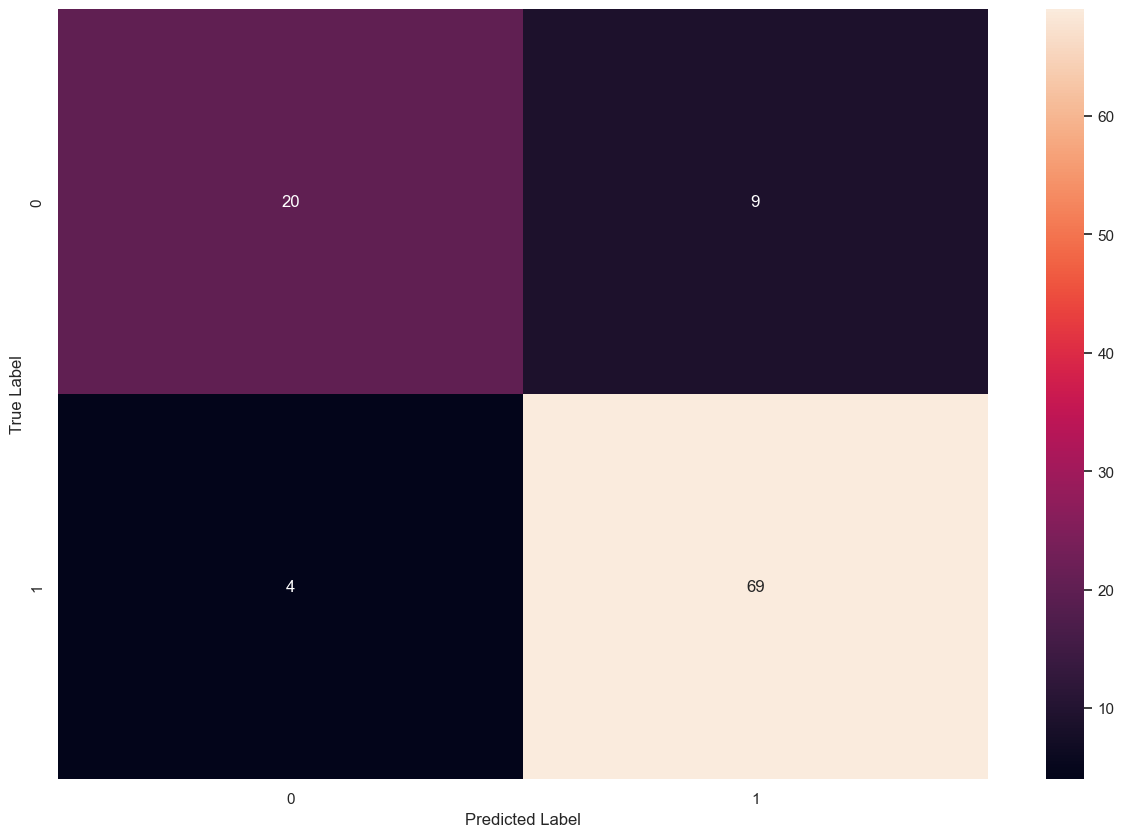

In [35]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

_<span style="color:blue; font-family: Arial;">Model performance improved from 79% to 92% accuracy</span>_


In [36]:
history.history

{'loss': [0.6445823311805725,
  0.5651064515113831,
  0.5461602807044983,
  0.5031766891479492,
  0.4408743679523468,
  0.3815722167491913,
  0.3279544413089752,
  0.22585080564022064,
  0.17497457563877106,
  0.13081270456314087,
  0.10020649433135986,
  0.17896007001399994,
  0.0950513705611229,
  0.07582634687423706,
  0.07813198864459991,
  0.0880829468369484,
  0.03645554184913635,
  0.01729576848447323,
  0.04170788452029228,
  0.008463176898658276,
  0.008061664178967476,
  0.043191097676754,
  0.005691742058843374,
  0.018726713955402374,
  0.00810285285115242,
  0.008437552489340305,
  0.08087342232465744,
  0.1735164374113083,
  0.08288033306598663,
  0.03818099573254585,
  0.018170904368162155,
  0.015855737030506134,
  0.004936655052006245,
  0.003390407655388117,
  0.002694087103009224,
  0.002259864006191492,
  0.0019083900842815638,
  0.0016621584072709084,
  0.0014488159213215113,
  0.0012802868150174618,
  0.0011424850672483444,
  0.0010341278975829482,
  0.00093587959

C:\Users\sagar\AppData\Local\Temp\ipykernel_10048\2930908805.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


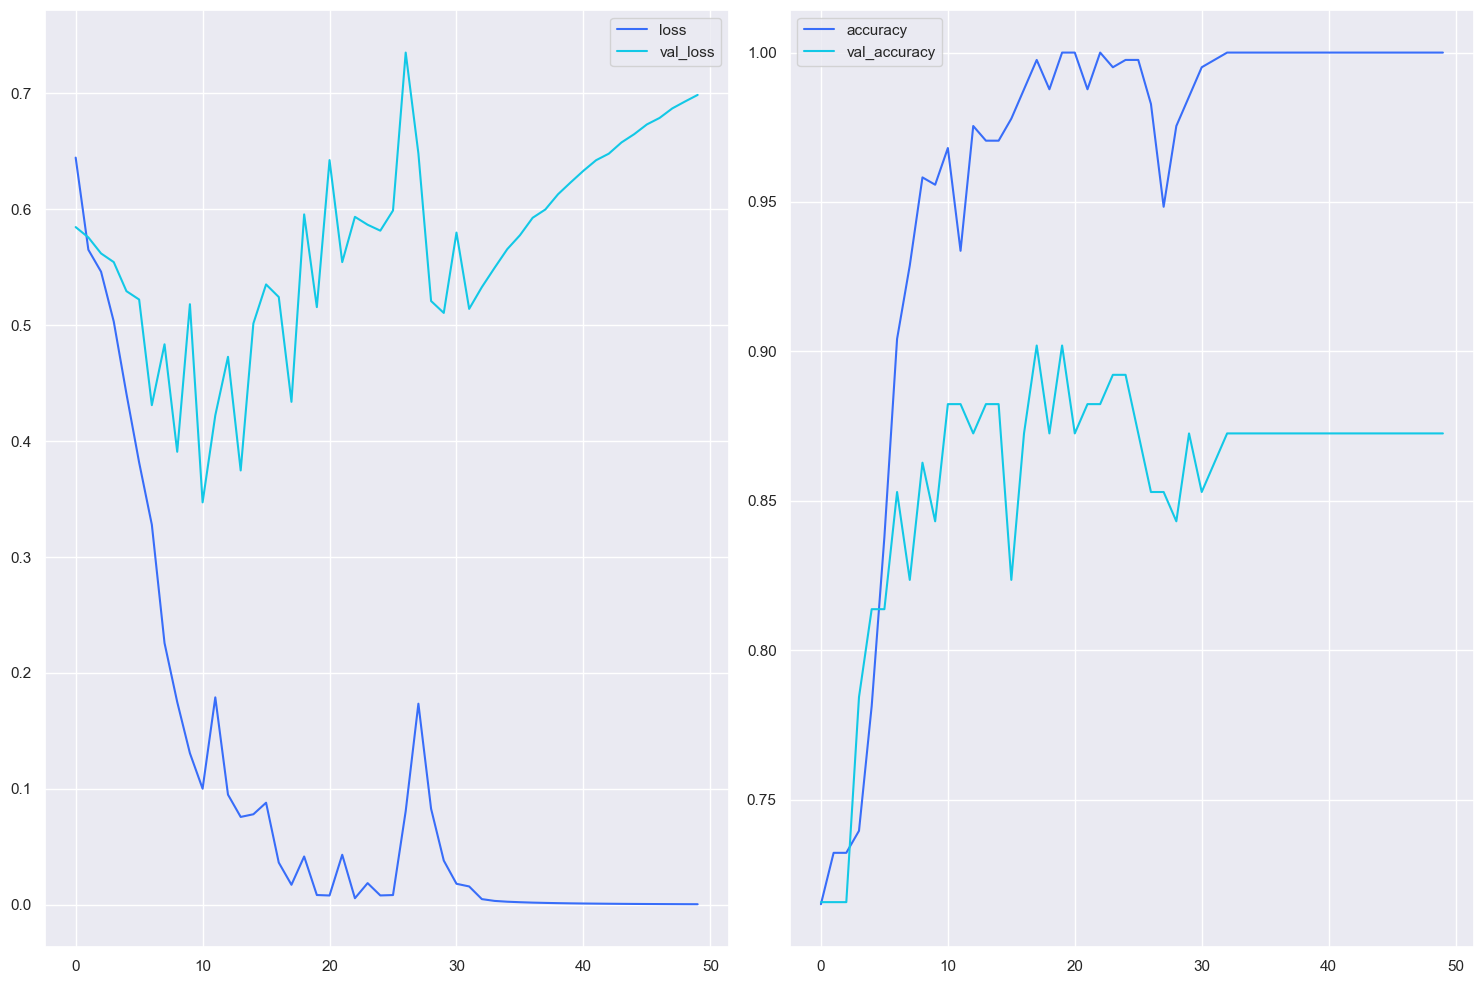

In [37]:
plot_history(history)